In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [249]:
import pandas as pd
df = pd.DataFrame({'A': ['one', 'one', 'two', 'two', 'one'] ,
                   'B': ['Ar', 'Br', 'Cr', 'Ar','Ar'] ,
                   'C': ['12/15/2011', '11/11/2001', '08/30/2015', '07/3/1999','03/03/2000' ],
                      'D':[1,7,3,4,5]})
df['C'] = pd.to_datetime(df['C']).sort_values


,A,B,C,D
0,one,Ar,2011-12-15,1
1,one,Br,2001-11-11,7
2,two,Cr,2015-08-30,3
3,two,Ar,1999-07-03,4
4,one,Ar,2000-03-03,5


In [257]:
df.groupby('A').apply(lambda x: x.sort_values('C', ascending=False)).reset_index(drop=True)

/tmp/ipykernel_11510/4279252355.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.groupby('A').apply(lambda x: x.sort_values('C', ascending=False)).reset_index(drop=True)


,A,B,C,D
0,one,Ar,2011-12-15,1
1,one,Br,2001-11-11,7
2,two,Cr,2015-08-30,3
3,two,Ar,1999-07-03,4
4,one,Ar,2000-03-03,5


In [259]:
action_df = pd.read_csv("dataset/actions.csv").dropna()
action_df.columns = ['account_id', 'book_id', 'creation_date']
action_df['creation_date'] = pd.to_datetime(action_df['creation_date'])
action_df['creation_date'] = action_df['creation_date'].dt.date
action_df

,account_id,book_id,creation_date
0,15548,9819,2022-01-02
1,10982,87139,2022-01-02
2,10982,87138,2022-01-02
3,10982,88465,2022-01-02
4,33041,68008,2022-01-02
...,...,...,...
1048570,46160,86053,2022-02-04
1048571,14652,26357,2022-02-04
1048572,71296,72107,2022-02-04
1048573,125340,115659,2022-02-04


In [246]:
action_df.groupby('account_id').apply(lambda x: x.sort_values('creation_date')).reset_index(drop=True)

account_id  book_id                 creation_date
account_id                                                          
0          709575           0   110668 2022-01-21 14:25:32.275693000
           916270           0   101254 2022-03-20 19:55:50.669112300
1          401524           1   109864 2022-01-13 08:51:12.777250700
           246889           1   110483 2022-02-24 06:49:35.977904900
           247138           1    37715 2022-02-24 06:55:53.026310500
...                       ...      ...                           ...
149086     692137      149086    54928 2022-04-26 19:10:27.418742400
149087     692217      149087    93140 2022-04-26 19:18:56.866687600
149088     692121      149088    77549 2022-04-26 19:09:34.879825000
149089     692168      149089    15114 2022-04-26 19:13:10.877684400
149090     692752      149090     4930 2022-04-26 19:26:44.822697900

[1048575 rows x 3 columns]

In [241]:
action_df.groupby('account_id').size().sort_values()

account_id
149090       1
48834        1
103398       1
103397       1
48837        1
          ... 
6638      2209
107713    2398
92755     2604
5834      2851
64465     7157
Length: 149091, dtype: int64

In [242]:
# book_df = pd.read_csv("dataset/book_data.csv").fillna(value=0)
book_df = pd.read_csv("dataset/book_data.csv").dropna()
book_df

,book_id,title,description,price,number_of_page,PhysicalPrice,publishDate,rating,publisher,categories,author_name,translator_name,lang
0,100,هفت گام برای شروع موفق یک کسب و کار,داشتن کسب‌وکاری مستقل، برای بسیاری به‌ویژه جوا...,2000,76,0,1390/05/01,2.600000,انتشارات سازمان مدیریت صنعتی,مدیریت و کسب و کار,نعیم ظفر,محسن؛ سحر حاجیانی؛ بحریه,En
1,104,صدف نبوت 4,مجموعه اشعار مناسبت های ایام فاطمیه ،ماه های ج...,5000,128,0,1390/01/14,5.000000,هلال,شعر کهن,غلامرضا سازگار,جواد زهتاب,En
2,107,مرآت ولایت ۲,مجموعه شعر آیینی- شیعی مرآت ولایت نوشته غلامرض...,5000,193,0,1388/03/02,5.000000,موسسه هلال,کلیات اسلام,غلامرضا سازگار,مسعود اسماعیلی,En
3,108,مرآت ولایت ۳,مجموعه شعر آیینی- شیعی مرآت ولایت نوشته غلامرض...,5000,203,0,1389/02/11,5.000000,موسسه هلال,شعر معاصر,غلامرضا سازگار,محمّدسعید میرزایی,En
4,109,مرآت ولایت ۴,مجموعه شعر آیینی- شیعی مرآت ولایت نوشته غلامرض...,5000,192,0,1390/01/25,5.000000,موسسه هلال,شعر معاصر,غلامرضا سازگار,محمّدسعید میرزایی,En
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15656,45328,نویسنده‌شدن,«نویسنده شدن» کتابی درباره نویسندگی و اثر دروت...,7500,144,14000,1395/10/17,3.111111,بنگاه ترجمه و نشر کتاب پارسه,پژوهش ادبی,دروتیا برند,آرش محمداولی,En
15658,45331,هیپی؛ داستان دوره‌ای از زندگی شخصی نویسنده درب...,«هیپی» کتابی از نویسنده توانای برزیلی، پائولو ...,13300,272,29500,1397/10/10,3.250000,بنگاه ترجمه و نشر کتاب پارسه,خاطرات,پائولو کوئیلو,مهدی آقامحمد زنجانی,En
15694,45422,یادداشت‌های امیراسدالله علم؛ دفتر اول,کتاب هفت جلدی «یادداشت‌های امیر اسدالله علم» د...,40000,1027,315000,1394/10/16,4.636364,انتشارات مازیار,تاریخ معاصر ایران,اسدالله علم,علینقی عالیخانی,En
15695,45424,یادداشت‌های امیراسدالله علم؛ دفتر دوم,کتاب هفت جلدی «یادداشت‌های امیر اسدالله علم» د...,40000,1078,315000,1394/10/13,3.714286,انتشارات مازیار,تاریخ معاصر ایران,اسدالله علم,علینقی عالیخانی,En


In [67]:
merged_df = pd.merge(action_df, book_df, on='book_id', how='inner')
# merged_df

In [81]:
features = merged_df.drop(['account_id', 'book_id', 'creation_date', 'rating',
                            'title', 'description', 'publishDate', 'publisher', 'categories', 'author_name', 'translator_name', 'lang'], axis=1)  # Input features
target = merged_df['rating']  # Output variable

In [82]:
features

,price,number_of_page,PhysicalPrice
0,1500,88,0
1,1500,88,0
2,1500,88,0
3,1500,88,0
4,1500,88,0
...,...,...,...
149872,5000,302,15000
149873,8000,232,15999
149874,1800,89,4500
149875,4200,160,11500


In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9347435057418546


## XGBOOST

In [135]:
import matplotlib.pyplot as plt


In [186]:
ratings = action_df.merge(book_df, how='inner', on='book_id')[['account_id','book_id', 'rating']]
ratings

,account_id,book_id,rating
0,15548,2199,3.625000
1,64824,2199,3.625000
2,55282,2199,3.625000
3,38633,2199,3.625000
4,49608,2199,3.625000
...,...,...,...
149872,32989,9078,4.000000
149873,1331,29260,5.000000
149874,122956,17115,4.222222
149875,69621,24644,4.000000


In [187]:
X_train, X_test, y_train, y_test = train_test_split(ratings[['account_id','book_id']], ratings['rating'], test_size=0.2, random_state=42)

In [200]:
group_train = X_train.groupby('account_id').size().to_frame('size')['size'].to_numpy()
group_test = X_test.groupby('account_id').size().to_frame('size')['size'].to_numpy()

In [167]:
# ratings = action_df.merge(book_df, how='inner', on='book_id')[['account_id','book_id', 'rating']]
# unique_relations = ratings.groupby('account_id').size().reset_index().rename(columns={0: 'count'})
# ratings = ratings.merge(unique_relations, on=['account_id'], how='left')
# ratings

,account_id,book_id,rating,count
0,15548,2199,3.625000,19
1,64824,2199,3.625000,7
2,55282,2199,3.625000,11
3,38633,2199,3.625000,53
4,49608,2199,3.625000,3
...,...,...,...,...
149872,32989,9078,4.000000,30
149873,1331,29260,5.000000,2
149874,122956,17115,4.222222,54
149875,69621,24644,4.000000,67


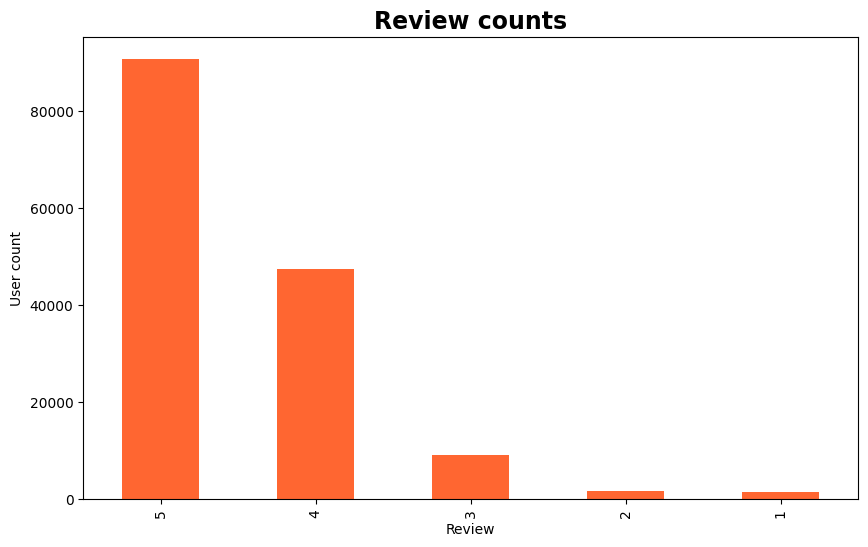

In [168]:
ratings.rating.apply(lambda x:int(np.ceil(x))).value_counts().plot.bar(figsize=(10,6),color='#FF6631')
plt.title("Review counts",fontweight='bold',fontsize=17)
plt.xlabel("Review")
plt.ylabel("User count")
plt.show()

In [203]:
X_train

,account_id,book_id
65103,10622,12551
139835,6157,32855
85020,122469,17021
90601,113593,19426
39108,72724,22379
...,...,...
119879,40023,39044
103694,125934,32897
131932,37525,28140
146867,42550,5611


In [226]:
import xgboost as xgb
model = xgb.XGBRanker(objective='rank:ndcg', n_estimators=2, random_state=0,learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    group=[list(group_train)],
    eval_metric='ndcg',
    eval_set=[(X_test, y_test)],
    eval_group=[list(group_test)],
    verbose =True
)

# model.fit(ratings[['account_id','book_id']], ratings['rating'], group=ratings['count'].to_list(), verbose=True)

/home/abolfazl/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-ndcg:0.98633
[1]	validation_0-ndcg:0.98674


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=2, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [214]:
X_train.head(1)

,account_id,book_id
65103,10622,12551


In [232]:
model.predict(pd.DataFrame([[15548, 210099]], columns=['account_id', 'book_id']))

array([0.62036145], dtype=float32)

In [ ]:
15548	2199	3.625000	19

In [216]:
pd.DataFrame([[15548, 2199]], columns=['account_id', 'book_id'])

,account_id,book_id
0,15548,2199
